<a href="https://colab.research.google.com/github/sadavarterohit/EIBEC3-Diffusion/blob/main/CTGAN-Philly-sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas sdv openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv("/content/city_payments_sector_label_fy2017.csv", header=0)

# Drop the 'ID' column if present
if 'ID' in data.columns:
    data = data.drop(columns=['ID'])

print(data.shape)
data.head()


(238894, 18)


,Unnamed: 0,fy,fm,check_date,document_no,dept,department_title,char_,character_title,sub_obj,sub_obj_title,vendor_name,doc_ref_no_prefix,doc_ref_no_prefix_definition,contract_number,contract_description,transaction_amount,sector
0,0,2017,10,2017-04-12,CHEK17119771,42,42 COMMERCE,2,02 PURCHASE OF SERVICES,231,OVERTIME MEALS 0231,EAT AT JOE'S,PVXX,payment voucher,NaN,NaN,66.82,Accommodation and Food Services
1,1,2017,12,2017-06-09,ACHD17177233,26,26 LICENSES & INSPECTIONS,2,02 PURCHASE OF SERVICES,211,TRANSPORTATION 0211,L & I Â TRAVEL IMPREST FUND,PVXX,payment voucher,NaN,NaN,127.33,Unknown
2,2,2017,5,2016-11-25,CHEK17063736,44,44 LAW,2,02 PURCHASE OF SERVICES,258,COURT REPORTERS 0258,"MARLENE BELL REPORTING, INC.",PVXX,payment voucher,NaN,NaN,454.20,"Professional, Scientific, and Technical Services"
3,3,2017,1,2016-07-07,CHEK17000247,11,11 POLICE,2,02 PURCHASE OF SERVICES,260,REPAIR AND MAINTENANCE CHARGES 0260,RICOH AMERICAS CORPORATION,VCXX,procurement,NaN,NaN,50.00,Information
4,4,2017,1,2016-07-08,ACHD17000233,23,23 PRISONS,3,03 MATERIALS AND SUPPLIES,313,FOOD 0313,PHILADELPHIA PRISONS,PCXX,petty cash,NaN,NaN,71.92,Public Administration (government agencies and...


In [ ]:
cat_attrs = ['fm', 'department_title', 'character_title', 'sub_obj_title', 'sector']
num_attrs = ['transaction_amount']
train = data[cat_attrs+num_attrs].copy()
train['fm'] = train['fm'].astype(str)

# Sample 100,000 rows from the cleaned dataset
train = train.sample(n=100000, random_state=42)
train

,fm,department_title,character_title,sub_obj_title,sector,transaction_amount
70142,12,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,Wholesale Trade,15.84
146071,5,44 LAW,02 PURCHASE OF SERVICES,COURT REPORTERS 0258,"Professional, Scientific, and Technical Services",202.25
154875,5,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,"Professional, Scientific, and Technical Services",250.00
154799,5,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,"Professional, Scientific, and Technical Services",150.00
228979,9,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,Wholesale Trade,16.96
...,...,...,...,...,...,...
195545,7,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,RENTS 0285,Information,242.48
218523,9,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,"Professional, Scientific, and Technical Services",250.00
199838,8,22 HUMAN SERVICES,02 PURCHASE OF SERVICES,RENTS 0285,Wholesale Trade,10.30
187750,7,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,Wholesale Trade,160.61


In [ ]:
from sdv.metadata import SingleTableMetadata

# Create metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=train)


In [ ]:
from sdv.single_table import CTGANSynthesizer

# Initialize the synthesizer with desired parameters
synthesizer = CTGANSynthesizer(
    metadata=metadata,
    enforce_rounding=True,
    epochs=500,
    verbose=True
)

# Train the synthesizer on your data
synthesizer.fit(train)


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:145: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
Gen. (-0.07) | Discrim. (-0.03): 100%|██████████| 500/500 [44:05<00:00,  5.29s/it]


In [ ]:
# Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=len(train))

print(synthetic_data.shape)
synthetic_data.head()


(100000, 6)


,fm,department_title,character_title,sub_obj_title,sector,transaction_amount
0,8,61 CITY CONTROLLER,03 MATERIALS AND SUPPLIES,BOOKS AND OTHER PUBLICATIONS 0304,Public Administration (government agencies and...,1426.29
1,2,36 REVENUE,02 PURCHASE OF SERVICES,PROFESSIONAL CONSULT/SPEC SERVICES 0250,Public Administration (government agencies and...,1015.19
2,10,12 STREETS,06 REAL PROPERTY,PROF SRV WATER MAINS 0605P,"Professional, Scientific, and Technical Services",1561.07
3,9,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,Wholesale Trade,2735.16
4,5,04 MDO-OFFICE OF TECHNOLOGY,06 REAL PROPERTY,IAPRF SVCCOMP SOFTIGDES/IMPL 06IBP,Information,7866.42


In [ ]:
synthetic_data.to_csv('phily_sector_ctgan.csv')

import pickle

# Save the object to a pickle file
filename = 'phily_sector_ctgan.pkl'
with open(filename, 'wb') as file:
    pickle.dump(synthesizer, file)

print(f"Object saved to {filename}")

Object saved to phily_sector_ctgan.pkl


In [ ]:
import sdv.evaluation.single_table as sdv_st
# generate quality report
quality_report = sdv_st.evaluate_quality(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 26.37it/s]|
Column Shapes Score: 76.94%

(2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 21.88it/s]|
Column Pair Trends Score: 69.78%

Overall Score (Average): 73.36%



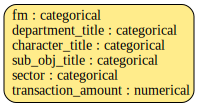

In [ ]:
metadata.visualize()

In [ ]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,fm,TVComplement,0.89127
1,department_title,TVComplement,0.73339
2,character_title,TVComplement,0.81651
3,sub_obj_title,TVComplement,0.70179
4,sector,TVComplement,0.79482
5,transaction_amount,KSComplement,0.67881


In [ ]:
fig = quality_report.get_visualization(property_name='Column Pair Trends')
fig.show()

In [ ]:
import sdv

for col in num_attrs:
  quality_report = sdv.evaluation.single_table.evaluate_quality(train, synthetic_data, metadata)
  fig = sdv.evaluation.single_table.get_column_plot(
      real_data=train,
      synthetic_data=synthetic_data,
      metadata=metadata,
      column_name=col
  )

  fig.show()

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 27.36it/s]|
Column Shapes Score: 76.94%

(2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 22.56it/s]|
Column Pair Trends Score: 69.81%

Overall Score (Average): 73.38%



In [ ]:
from sdmetrics.single_column import BoundaryAdherence
from sdmetrics.single_column import RangeCoverage

for i in num_attrs:
    print(i +  " " +
    str(BoundaryAdherence.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    ))
       + ", RangeCoverage  " +
          str(RangeCoverage.compute(
              real_data=train[i],
        synthetic_data=synthetic_data[i]
          )) )

transaction_amount 1.0, RangeCoverage  0.031158443868982588


In [ ]:
from sdmetrics.single_column import CategoryAdherence
from sdmetrics.single_column import CategoryCoverage

for i in cat_attrs:
    print(i +  " CategoryAdherence" +
    str(CategoryAdherence.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    ))
    + ", CategoryCoverage : " + str(CategoryCoverage.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    )))


fm CategoryAdherence1.0, CategoryCoverage : 1.0
department_title CategoryAdherence1.0, CategoryCoverage : 1.0
character_title CategoryAdherence1.0, CategoryCoverage : 1.0
sub_obj_title CategoryAdherence1.0, CategoryCoverage : 1.0
sector CategoryAdherence1.0, CategoryCoverage : 1.0


In [ ]:
from sklearn.model_selection import train_test_split

#train_, test = train_test_split(train, test_size=0.3, random_state=42, stratify = train[cat_attrs])
test = data[cat_attrs+num_attrs].copy()
test['fm'] = test['fm'].astype(str)
test = test[~test.index.isin(train.index)]
for cat in cat_attrs:
    test = test[test[cat].isin(train[cat].unique())]
test = test.sample(n=30000, random_state=42)

In [ ]:
'''
Compute Utility Score
'''

from sdmetrics.single_table import  LinearRegression

test_synthetic = test.copy()
for cat in cat_attrs:
    test_synthetic = test_synthetic[test_synthetic[cat].isin(synthetic_data[cat].unique())]
missed_cat_penalty =  test_synthetic.shape[0]/test.shape[0]

synthetic_data_r2 = LinearRegression.compute(
    test_data=test_synthetic,
    train_data=synthetic_data,
    target='transaction_amount',
    metadata=metadata.to_dict()
)

real_data_r2 = LinearRegression.compute(
    test_data=test,
    train_data=train,
    target='transaction_amount',
    metadata=metadata.to_dict()
)

print(f'Utility Score: {min(synthetic_data_r2*missed_cat_penalty/real_data_r2 , 1)}')

Utility Score: 0.09296739187695487


In [ ]:
from sdmetrics.single_table import DCRBaselineProtection

privacy = DCRBaselineProtection.compute_breakdown(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata.to_dict(),
    num_rows_subsample = 100,
    num_iterations =50
)
print(f'Privacy Score: {privacy["score"]}')

Privacy Score: 0.49802266225258607


In [ ]:
from sdmetrics.single_table import NewRowSynthesis

NewRowSynthesis.compute(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata.to_dict(),
    numerical_match_tolerance=0.01,
    synthetic_sample_size=3000
)

0.9343333333333333